In [27]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

In [3]:
data = pd.read_csv('Housing_Price_Data.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.shape

(545, 13)

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
duplicates = data.duplicated().sum()
duplicates

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
status_one_hot = pd.get_dummies(data.furnishingstatus, dtype = int)
status_one_hot.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
data['mainroad'] = data.mainroad.astype('category')
data['guestroom'] = data.guestroom.astype('category')
data['basement'] = data.basement.astype('category')
data['hotwaterheating'] = data.hotwaterheating.astype('category')
data['airconditioning'] = data.airconditioning.astype('category')
data['prefarea'] = data.prefarea.astype('category')
data['furnishingstatus'] = data.furnishingstatus.astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [13]:
data['mainroad'] = data.mainroad.cat.codes
data['guestroom'] = data.guestroom.cat.codes
data['basement'] = data.basement.cat.codes
data['hotwaterheating'] = data.hotwaterheating.cat.codes
data['airconditioning'] = data.airconditioning.cat.codes
data['prefarea'] = data.prefarea.cat.codes
data['furnishingstatus'] = data.furnishingstatus.cat.codes

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int8 
 6   guestroom         545 non-null    int8 
 7   basement          545 non-null    int8 
 8   hotwaterheating   545 non-null    int8 
 9   airconditioning   545 non-null    int8 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int8 
 12  furnishingstatus  545 non-null    int8 
dtypes: int64(6), int8(7)
memory usage: 29.4 KB


In [15]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [16]:
data['mainroad'].value_counts()

mainroad
1    468
0     77
Name: count, dtype: int64

#### Data Visualization

<Axes: >

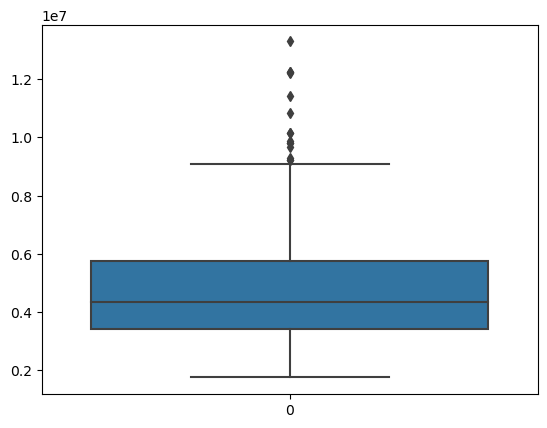

In [36]:
sns.boxplot(data.price)

<Axes: xlabel='bedrooms', ylabel='count'>

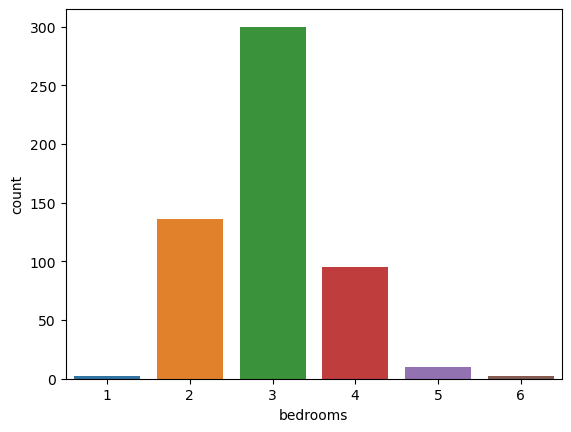

In [33]:
sns.countplot(x = 'bedrooms', data = data)

<Axes: xlabel='furnishingstatus', ylabel='count'>

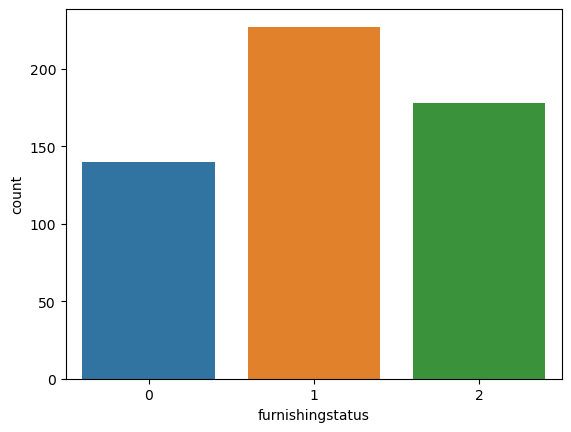

In [43]:
sns.countplot(x = 'furnishingstatus', data = data)

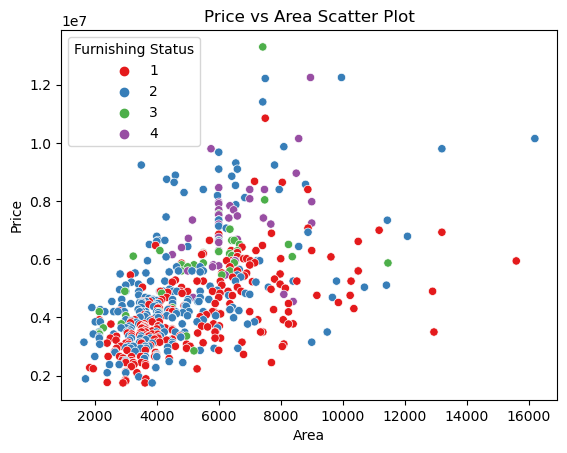

In [51]:
sns.scatterplot(x = 'area', y = 'price', hue = 'stories', data = data, palette="Set1")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')

C:\Users\Shivani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


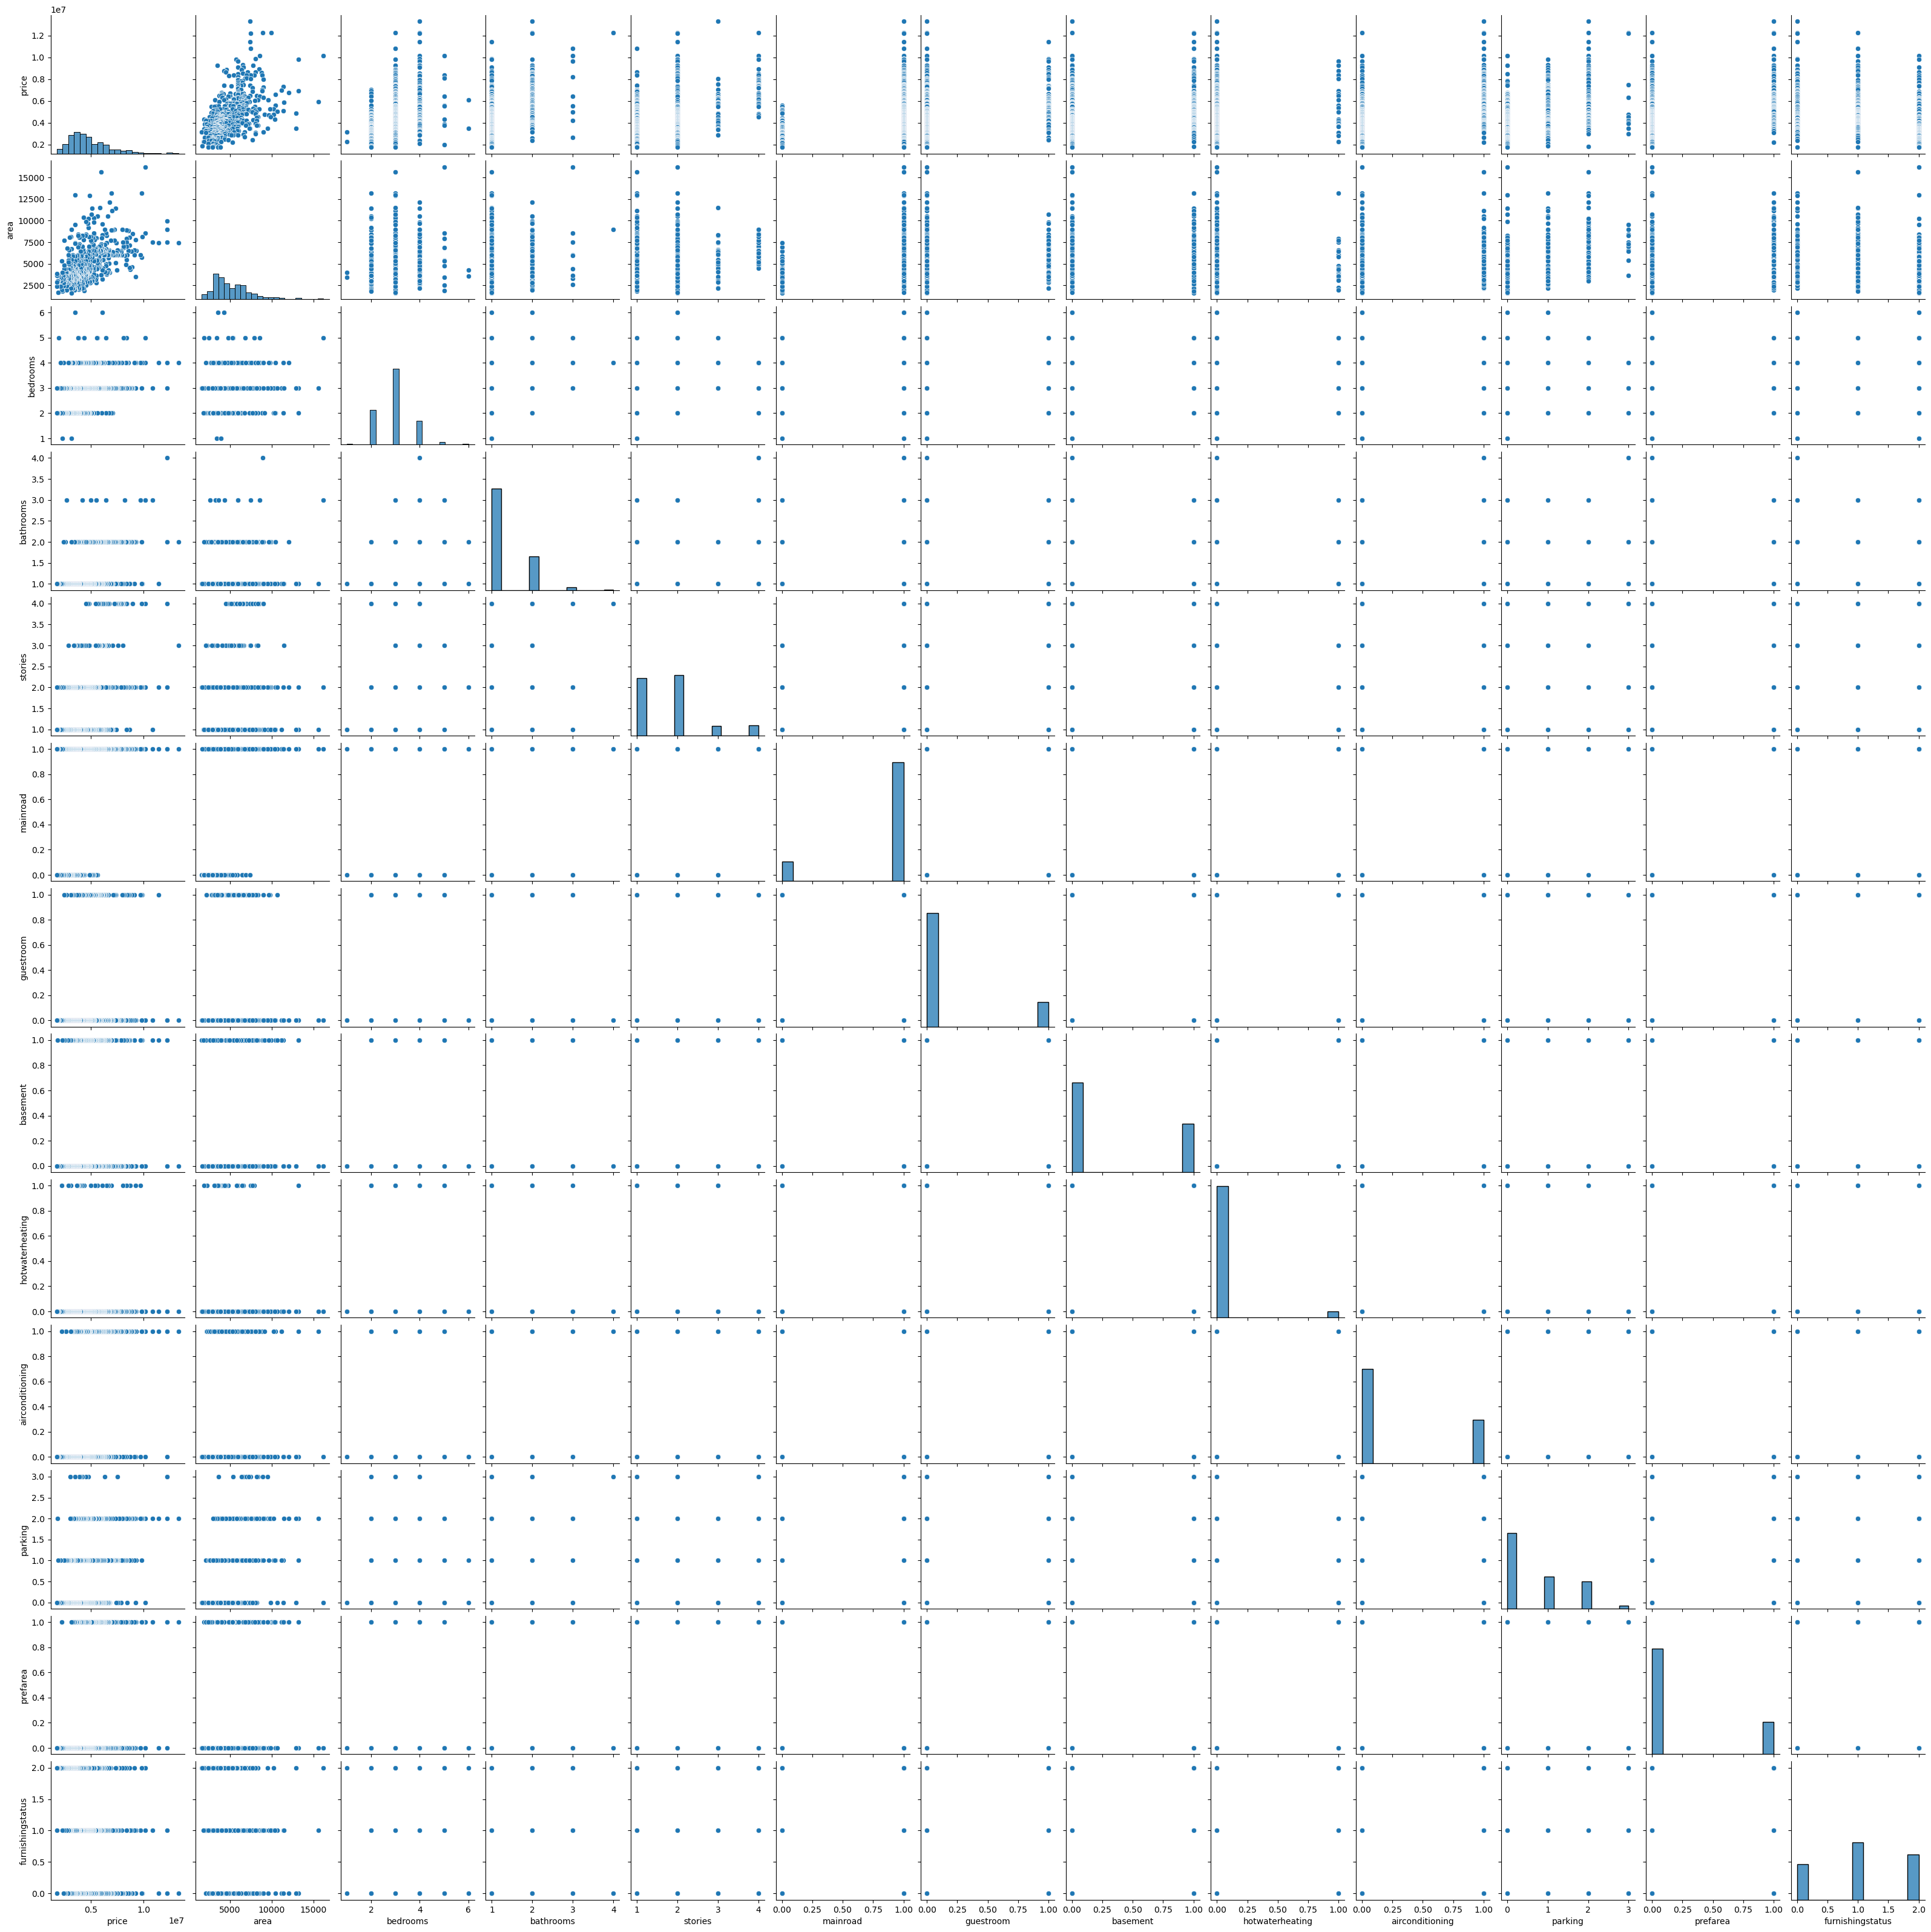

In [162]:
sns.pairplot(data)

#### Feature Engineering


In [17]:
df = data.copy()
df = df.join(status_one_hot)
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'furnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [18]:
cat_vars=['bedrooms','bathrooms','mainroad','prefarea']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    df = df.join(cat_list)

In [19]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'furnished',
       'semi-furnished', 'unfurnished', 'bedrooms_1', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1',
       'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'mainroad_0', 'mainroad_1',
       'prefarea_0', 'prefarea_1'],
      dtype='object')

In [20]:
categorical = ['bedrooms', 'bathrooms', 'mainroad', 'prefarea', 'furnishingstatus']
df_vars = df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in categorical]

In [21]:
df = df[to_keep]
df.columns.values

array(['price', 'area', 'stories', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'furnished',
       'semi-furnished', 'unfurnished', 'bedrooms_1', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4',
       'mainroad_0', 'mainroad_1', 'prefarea_0', 'prefarea_1'],
      dtype=object)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


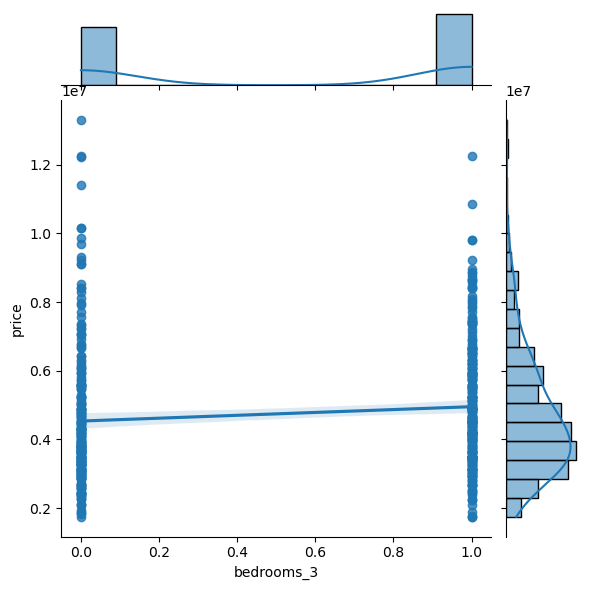

In [42]:
sns.jointplot(data = df, x = 'bedrooms_3', y = 'price', kind = "reg")

#### Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [64]:
X = df["area"].values.reshape(-1,1)
y = df["price"].values

In [70]:
#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [72]:
score = lr.score(X_test, y_test);
print(f"Model Score {round(lr.score(X_test, y_test) * 100, 2)}%")

Model Score 24.39%


Text(0.5, 1.0, 'Actual vs Predicted Values')

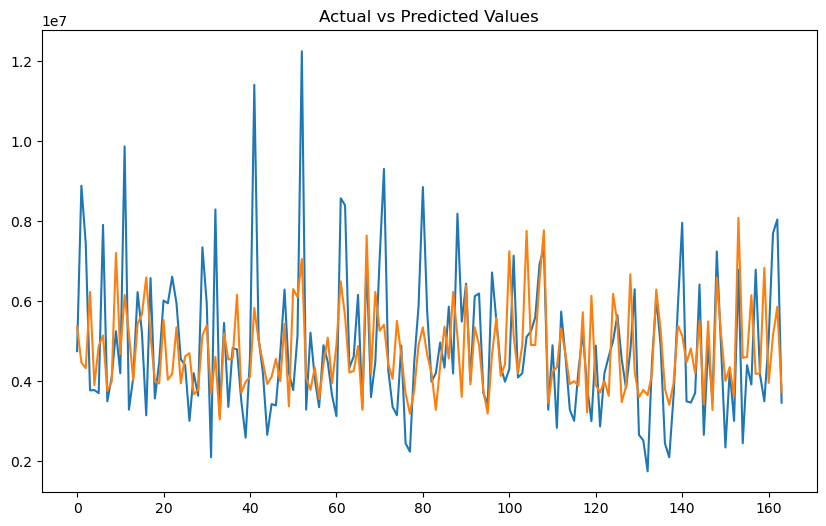

In [73]:
# Plotting a predicted values vs the actual values

plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1148319.8223711844
MSE: 2467387924628.81
RMSE: 1570792.1328517054
